# 1. Define Your Research Question and Dataset
## Research Question:
"What factors influence customer loyalty in retail purchases?"

# Dataset Description:
## Source: 
    Hypothetical retail dataset containing customer purchase behavior.

## Key Variables: 
Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount, Location, Season, Subscription Status, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, and Frequency of Purchases.

## Sample Size: 
    A hypothetical dataset of 3,900 customers, each with detailed purchase records.

# Example datasets
Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,

1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly

Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases

Yes,Express,Yes,Yes,14,Venmo,Fortnightly


## Quantitative Variables
    "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"

## Quantitative Variables
    "Gender", "Subscription Status", "Promo Code Used", "Discount Applied", "Frequency of Purchases"

# 2. Summarize Key Data with Descriptive Statistics
• Present summary statistics (mean, median, variance, etc.) visually using bar
charts, pie charts, or histograms.
• Highlight any interesting patterns or trends you observe in the data.

In [6]:
import pandas as pd

csv_file_path = 'shopping_trends_updated.csv'

df = pd.read_csv(csv_file_path)

print(df.head(10))

   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       G

In [33]:
import pandas as pd

csv_file_path = 'shopping_trends_updated.csv'

df = pd.read_csv(csv_file_path)

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# 2. Handle missing values
# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with a specific value (e.g., 0 or 'Unknown')
df_cleaned = df.fillna({'Age': 0, 'Purchase Amount (USD)': 0, 'Review Rating': 0, 'Previous Purchases': 0, 'Gender': 'Unknown', 'Subscription Status': 'Unknown', 'Promo Code Used': 'Unknown', 'Discount Applied': 'Unknown', 'Frequency of Purchases': 'Unknown'})

# 3. Convert columns to appropriate data types
# Example: Convert 'Age' and 'Purchase Amount (USD)' to numeric
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned['Purchase Amount (USD)'] = pd.to_numeric(df_cleaned['Purchase Amount (USD)'], errors='coerce')
df_cleaned['Review Rating'] = pd.to_numeric(df_cleaned['Review Rating'], errors='coerce')
df_cleaned['Previous Purchases'] = pd.to_numeric(df_cleaned['Previous Purchases'], errors='coerce')

# 4. Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Save the cleaned data to a new CSV file
cleaned_csv_file_path = 'shopping_trends_cleaned.csv'
df_cleaned.to_csv(cleaned_csv_file_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_file_path}")

Cleaned data saved to shopping_trends_cleaned.csv


In [34]:
import pandas as pd

csv_file_path = 'shopping_trends_cleaned.csv'

df = pd.read_csv(csv_file_path)

quantitative_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]

for col in quantitative_cols:
    print(f"Statistics for {col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print("-" * 30)

# Calculate descriptive statistics
descriptive_stats = df[quantitative_cols].agg(["mean", "median", "var", "std"])
print("Descriptive Statistics:\n", descriptive_stats)

Statistics for Age:
Mean: 44.07
Median: 44.00
Variance: 231.27
Standard Deviation: 15.21
------------------------------
Statistics for Purchase Amount (USD):
Mean: 59.76
Median: 60.00
Variance: 561.00
Standard Deviation: 23.69
------------------------------
Statistics for Review Rating:
Mean: 3.75
Median: 3.70
Variance: 0.51
Standard Deviation: 0.72
------------------------------
Statistics for Previous Purchases:
Mean: 25.35
Median: 25.00
Variance: 208.72
Standard Deviation: 14.45
------------------------------
Descriptive Statistics:
                Age  Purchase Amount (USD)  Review Rating  Previous Purchases
mean     44.068462              59.764359       3.749949           25.351538
median   44.000000              60.000000       3.700000           25.000000
var     231.270767             560.997806       0.512975          208.719426
std      15.207589              23.685392       0.716223           14.447125


In [35]:
import pandas as pd

csv_file_path = 'shopping_trends_cleaned.csv'

df = pd.read_csv(csv_file_path)

# Categorical Variables
categorical_cols = ["Gender", "Subscription Status", "Promo Code Used", "Discount Applied", "Frequency of Purchases"]

# Count occurrences for each categorical variable
for col in categorical_cols:
    print(f"Occurrences for {col}:")
    print(df[col].value_counts())
    print("-" * 30)

Occurrences for Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64
------------------------------
Occurrences for Subscription Status:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64
------------------------------
Occurrences for Promo Code Used:
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64
------------------------------
Occurrences for Discount Applied:
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64
------------------------------
Occurrences for Frequency of Purchases:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64
------------------------------


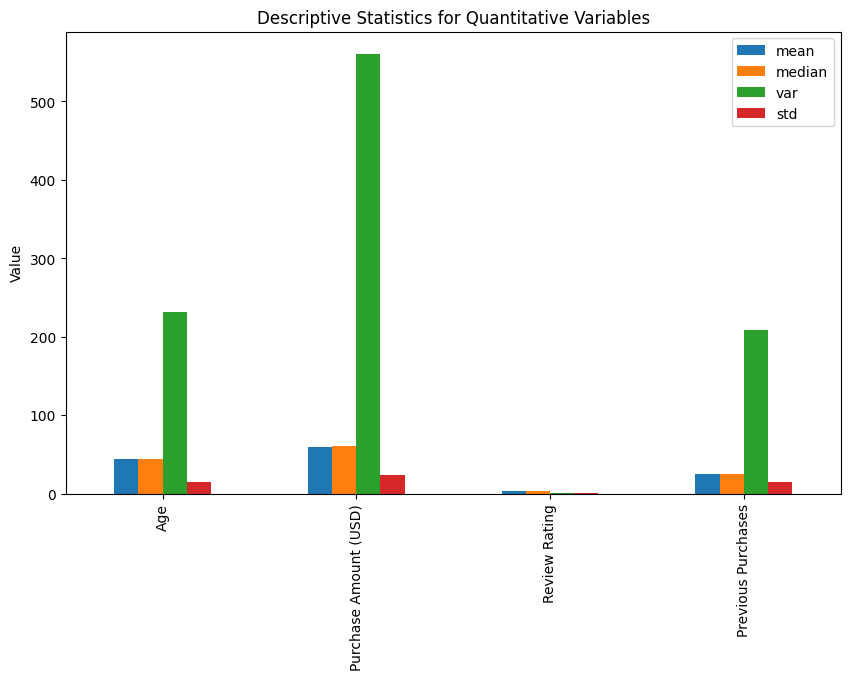

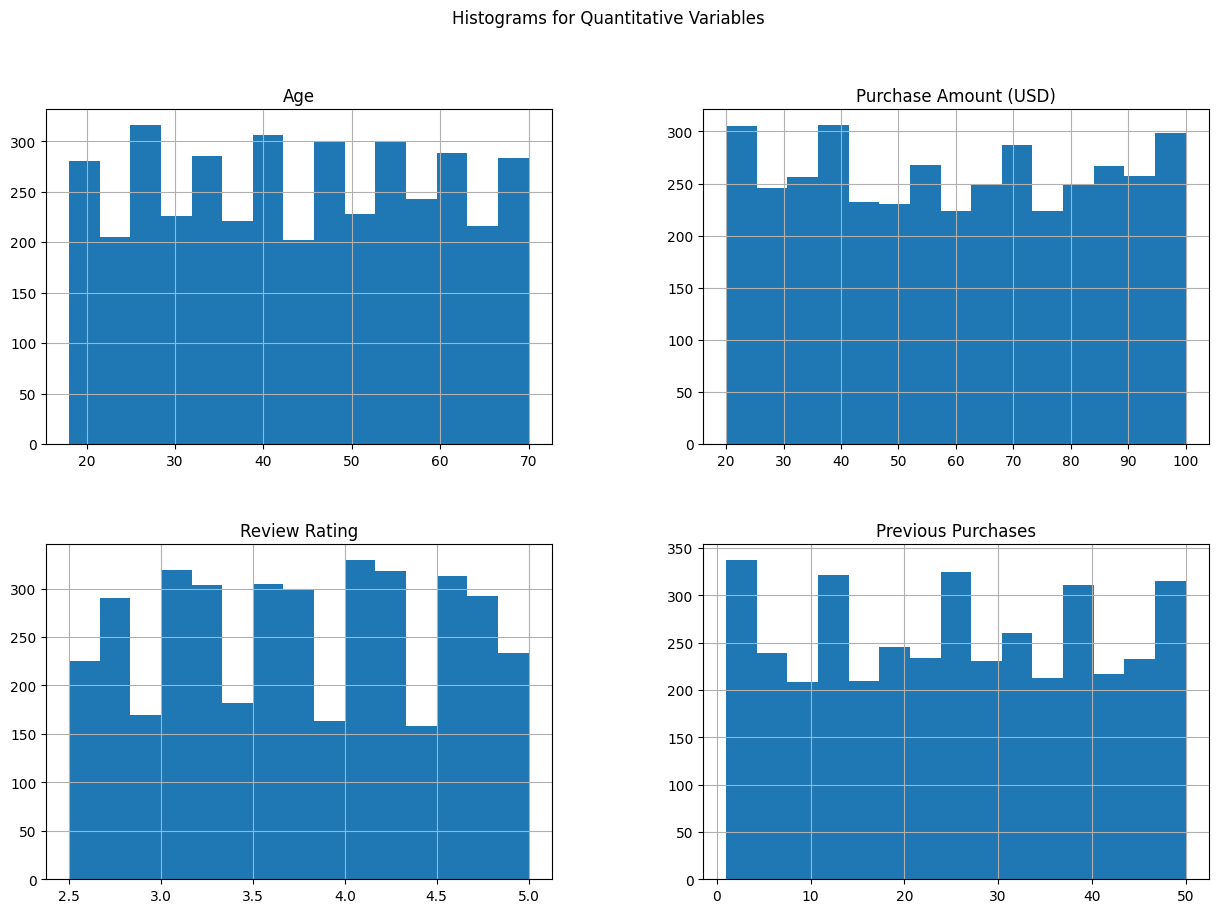

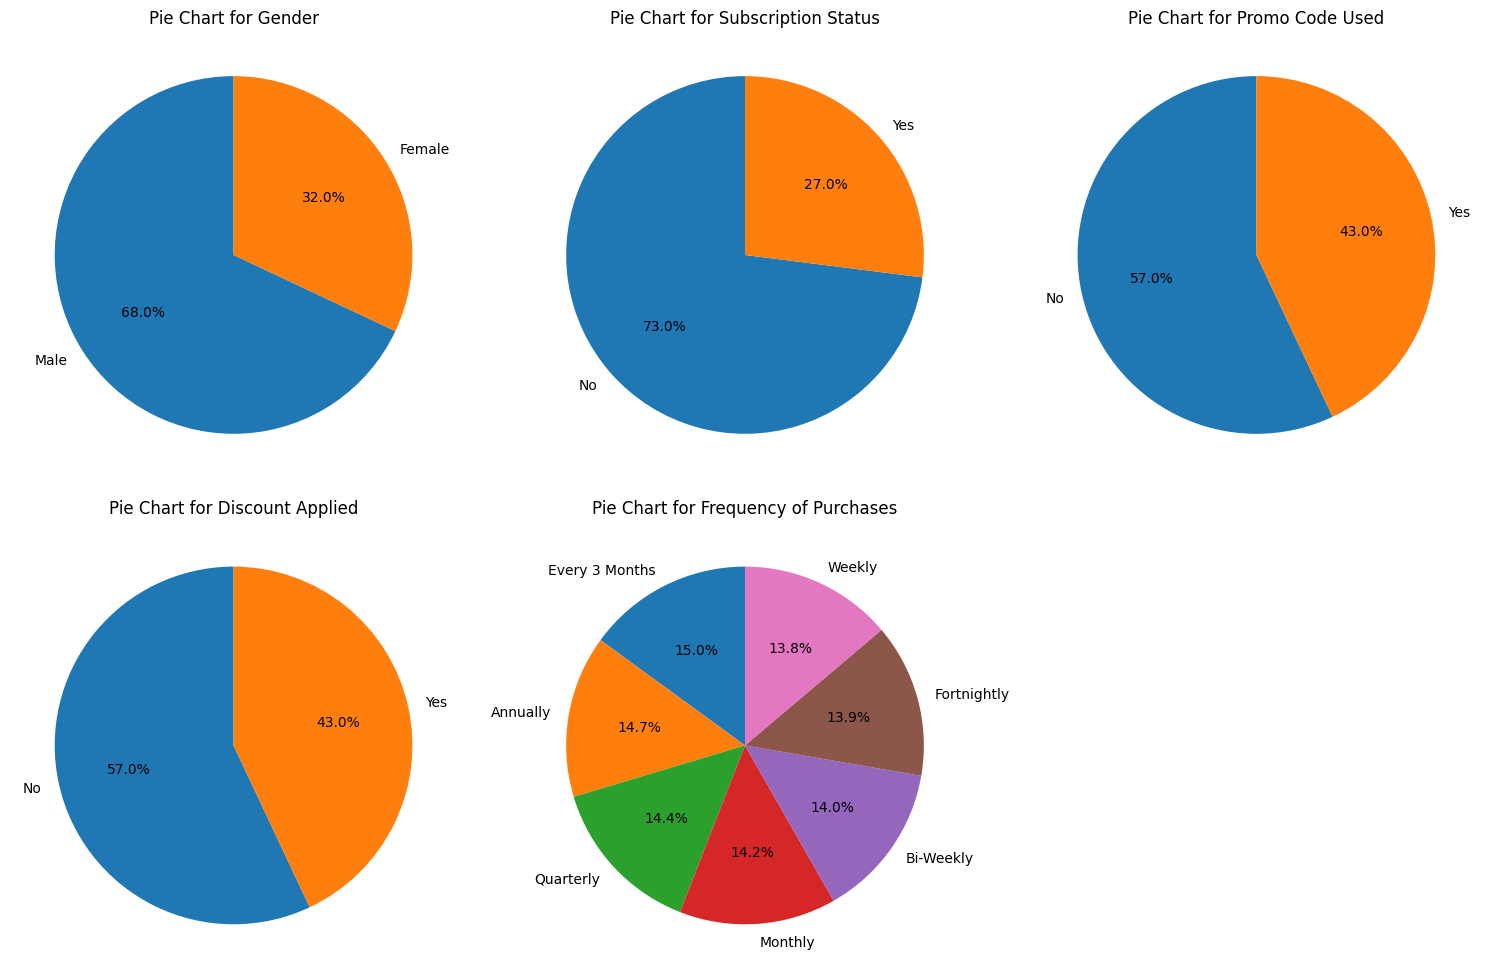

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'shopping_trends_cleaned.csv'

df = pd.read_csv(csv_file_path)

# Calculate descriptive statistics
descriptive_stats = df[quantitative_cols].agg(["mean", "median", "var", "std"])

# Plot bar charts for descriptive statistics
descriptive_stats.T.plot(kind='bar', figsize=(10, 6))
plt.title('Descriptive Statistics for Quantitative Variables')
plt.ylabel('Value')
plt.show()

# Plot histograms for quantitative variables
df[quantitative_cols].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histograms for Quantitative Variables')
plt.show()

# Categorical Variables
categorical_cols = ["Gender", "Subscription Status", "Promo Code Used", "Discount Applied", "Frequency of Purchases"]

# Plot pie charts for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Pie Chart for {col}')
    axes[i].set_ylabel('')

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# 3. Conduct a Probability Analysis
• Calculate and visualize the probability of a key outcome (e.g., probability of
customer satisfaction above a certain threshold, or probability of achieving a top
score).
• Explain the significance of these probabilities in relation to your research
question.

Probability of Customer Satisfaction (Review Rating >= 4.0): 0.42

Satisfaction Probability by Subscription Status:
Subscription Status
No     0.423955
Yes    0.415005
Name: Satisfied, dtype: float64


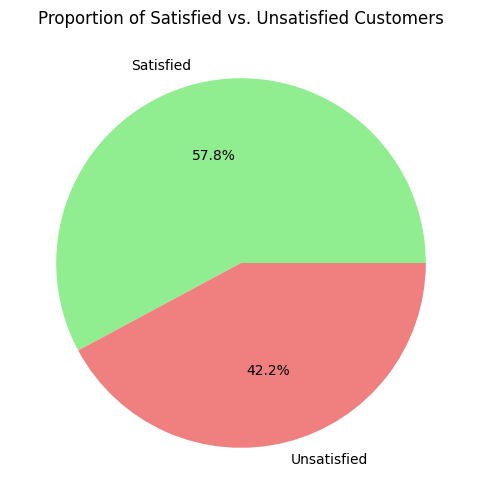

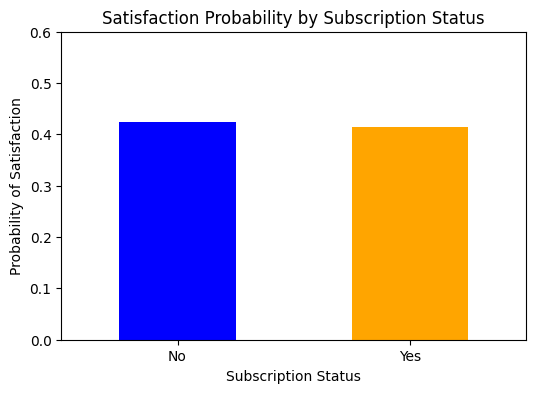

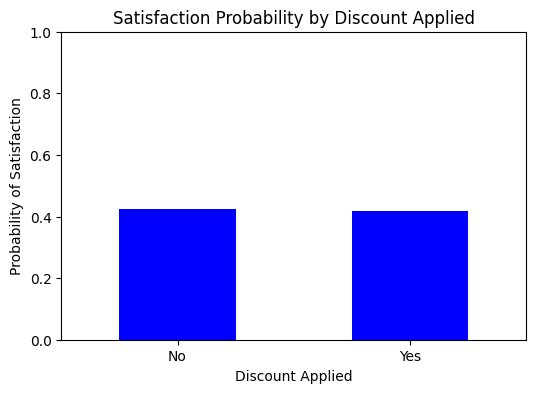

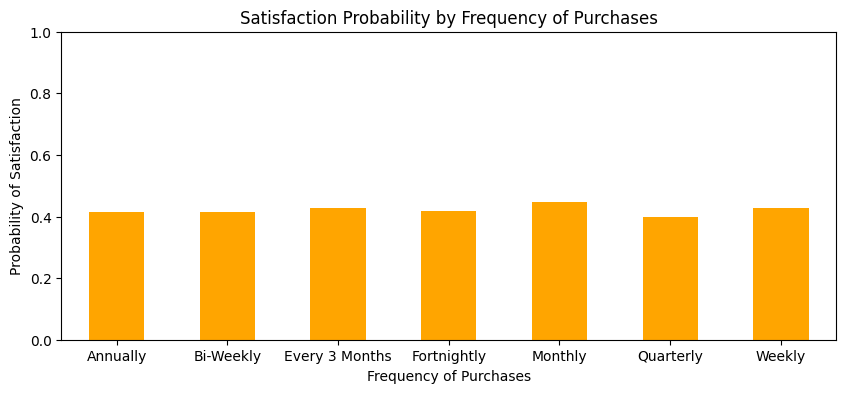

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'shopping_trends_cleaned.csv'

df = pd.read_csv(csv_file_path)

# Define satisfaction threshold
threshold = 4.0

# Calculate the number of satisfied customers
df["Satisfied"] = df["Review Rating"] >= threshold

# Calculate probability of satisfaction
prob_satisfaction = df["Satisfied"].mean()
print(f"Probability of Customer Satisfaction (Review Rating >= {threshold}): {prob_satisfaction:.2f}")

# Group probabilities by Subscription Status
satisfaction_by_subscription = df.groupby("Subscription Status")["Satisfied"].mean()
print("\nSatisfaction Probability by Subscription Status:")
print(satisfaction_by_subscription)

# Visualization 1: Pie Chart for Overall Satisfaction
satisfied_counts = df["Satisfied"].value_counts()
plt.figure(figsize=(6, 6))
satisfied_counts.plot.pie(autopct="%.1f%%", colors=["lightgreen", "lightcoral"], labels=["Satisfied", "Unsatisfied"])
plt.title("Proportion of Satisfied vs. Unsatisfied Customers")
plt.ylabel("")
plt.show()

# Visualization 2: Bar Chart for Satisfaction by Subscription Status
plt.figure(figsize=(6, 4))
satisfaction_by_subscription.plot(kind="bar", color=["blue", "orange"])
plt.title("Satisfaction Probability by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Probability of Satisfaction")
plt.ylim(0, 0.6)
plt.xticks(rotation=0)
plt.show()

# Calculate satisfaction by Discount Applied
satisfaction_by_discount = df.groupby("Discount Applied")["Satisfied"].mean()

# Calculate satisfaction by Frequency of Purchases
satisfaction_by_frequency = df.groupby("Frequency of Purchases")["Satisfied"].mean()

# Visualization3: Bar Chart for Satisfaction by Discount Applied
plt.figure(figsize=(6, 4))
satisfaction_by_discount.plot(kind="bar", color="blue")
plt.title("Satisfaction Probability by Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Probability of Satisfaction")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=0)
plt.show()

# Visualization:4 Bar Chart for Satisfaction by Frequency of Purchases
plt.figure(figsize=(10, 4))
satisfaction_by_frequency.plot(kind="bar", color="orange")
plt.title("Satisfaction Probability by Frequency of Purchases")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Probability of Satisfaction")
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=0)
plt.show()

# 4. Perform Hypothesis Testing
• State and test a hypothesis related to your research question (e.g., “Is there a
significant difference in behavior between two groups?”).
• Show your results visually (e.g., p-values, confidence intervals) and briefly
summarize your findings.

Hypothesis 1 (H1):

Null Hypothesis (H₀): Subscription status does not affect review ratings.
Alternative Hypothesis (H₁): Subscription status affects review ratings.
Hypothesis 2 (H2):

Null Hypothesis (H₀): Discount applied does not affect purchase amount.
Alternative Hypothesis (H₁): Discount applied affects purchase amount.
Hypothesis 3 (H3):

Null Hypothesis (H₀): There is no correlation between previous purchases and purchase amount.
Alternative Hypothesis (H₁): There is a correlation between previous purchases and purchase amount.
Hypothesis 4 (H4):

Null Hypothesis (H₀): Promo code usage does not affect review ratings.
Alternative Hypothesis (H₁): Promo code usage affects review ratings.

H1: T-Stat = -0.40, P-Value = 0.6910
H2: T-Stat = -1.11, P-Value = 0.2665
H3: Correlation = 0.01, P-Value = 0.6147
H4: T-Stat = -0.78, P-Value = 0.4357


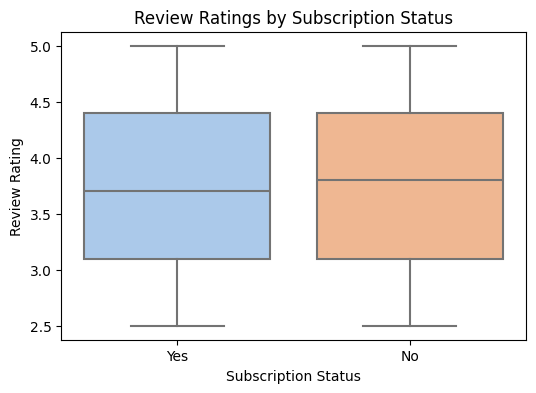

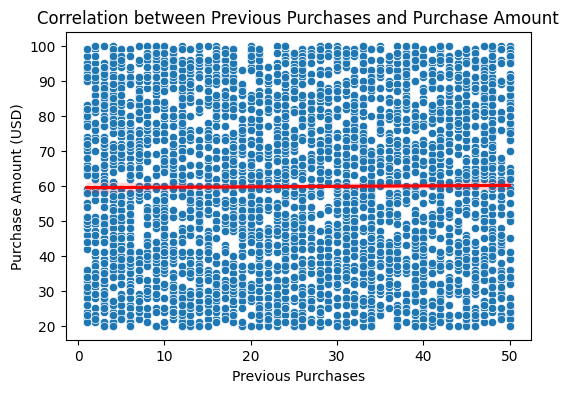

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = 'shopping_trends_cleaned.csv'

df = pd.read_csv(csv_file_path)

# H1: Subscription Status and Review Ratings
subscribed = df[df["Subscription Status"] == "Yes"]["Review Rating"]
not_subscribed = df[df["Subscription Status"] == "No"]["Review Rating"]
t_stat, p_value1 = ttest_ind(subscribed, not_subscribed)
print(f"H1: T-Stat = {t_stat:.2f}, P-Value = {p_value1:.4f}")

# H2: Discount Applied and Purchase Amount
discount_applied = df[df["Discount Applied"] == "Yes"]["Purchase Amount (USD)"]
no_discount = df[df["Discount Applied"] == "No"]["Purchase Amount (USD)"]
t_stat, p_value2 = ttest_ind(discount_applied, no_discount)
print(f"H2: T-Stat = {t_stat:.2f}, P-Value = {p_value2:.4f}")

# H3: Correlation between Previous Purchases and Purchase Amount
corr, p_value3 = pearsonr(df["Previous Purchases"], df["Purchase Amount (USD)"])
print(f"H3: Correlation = {corr:.2f}, P-Value = {p_value3:.4f}")

# H4: Promo Code Used and Review Ratings
promo_used = df[df["Promo Code Used"] == "Yes"]["Review Rating"]
no_promo = df[df["Promo Code Used"] == "No"]["Review Rating"]
t_stat, p_value4 = ttest_ind(promo_used, no_promo)
print(f"H4: T-Stat = {t_stat:.2f}, P-Value = {p_value4:.4f}")

# Visualize Results
# Visualization for H1: Boxplot of Review Ratings by Subscription Status
plt.figure(figsize=(6, 4))
sns.boxplot(x="Subscription Status", y="Review Rating", data=df, palette="pastel")
plt.title("Review Ratings by Subscription Status")
plt.show()

# Visualization for H3: Scatter plot for Correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Previous Purchases", y="Purchase Amount (USD)", data=df)
sns.regplot(x="Previous Purchases", y="Purchase Amount (USD)", data=df, scatter=False, color="red")
plt.title("Correlation between Previous Purchases and Purchase Amount")
plt.show()
